In [147]:
import pandas as pd

df=pd.read_csv('MatrizTopics_LDA_index_fecha.csv', delimiter=';')

#tipo de dato
#type(df['FECHA'].iloc[0])
#formato de fecha
df['Date']= pd.to_datetime(df['FECHA'],format="%d/%m/%Y")
df = df.sort_values(by=['Date'])
df

,id,FECHA,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,Date
25469,25469,06/01/2015,0.000222,0.172790,0.469906,0.000222,0.000222,0.000222,0.097926,0.000222,...,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222,2015-01-06
22075,22075,26/02/2015,0.316065,0.000694,0.000694,0.033692,0.000694,0.000694,0.535750,0.000694,...,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,2015-02-26
24857,24857,18/05/2015,0.000368,0.000368,0.000368,0.093248,0.000368,0.000368,0.029088,0.815238,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368,2015-05-18
22274,22274,18/05/2015,0.000298,0.000298,0.000298,0.000298,0.000298,0.000298,0.120299,0.000298,...,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298,2015-05-18
22273,22273,18/05/2015,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.300942,0.000658,...,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658,2015-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,28698,26/04/2019,0.000342,0.062992,0.000342,0.000342,0.000342,0.000342,0.741074,0.000342,...,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,2019-04-26
28714,28714,26/04/2019,0.051618,0.039024,0.000172,0.000172,0.000172,0.131093,0.190868,0.000172,...,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172,2019-04-26
28693,28693,26/04/2019,0.000617,0.157081,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,...,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617,2019-04-26
28703,28703,26/04/2019,0.000658,0.000658,0.000658,0.047664,0.000658,0.000658,0.862033,0.000658,...,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,2019-04-26


In [148]:
df_bolsa=pd.read_csv('IBEX.csv', delimiter=',')
df_bolsa

#tipo de dato
#type(df_bolsa['Date'].iloc[0])
#formato de fecha
df_bolsa['Date']=pd.to_datetime(df_bolsa['Date'])



In [149]:
#Prediccion por dia completo
#Preparamos las columnas para agrupar
df= df.iloc[:,1:23]
df

,FECHA,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Date
25469,06/01/2015,0.000222,0.172790,0.469906,0.000222,0.000222,0.000222,0.097926,0.000222,0.000222,...,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222,2015-01-06
22075,26/02/2015,0.316065,0.000694,0.000694,0.033692,0.000694,0.000694,0.535750,0.000694,0.000694,...,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,2015-02-26
24857,18/05/2015,0.000368,0.000368,0.000368,0.093248,0.000368,0.000368,0.029088,0.815238,0.000368,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368,2015-05-18
22274,18/05/2015,0.000298,0.000298,0.000298,0.000298,0.000298,0.000298,0.120299,0.000298,0.000298,...,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298,2015-05-18
22273,18/05/2015,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.300942,0.000658,0.000658,...,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658,2015-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,26/04/2019,0.000342,0.062992,0.000342,0.000342,0.000342,0.000342,0.741074,0.000342,0.000342,...,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,2019-04-26
28714,26/04/2019,0.051618,0.039024,0.000172,0.000172,0.000172,0.131093,0.190868,0.000172,0.121914,...,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172,2019-04-26
28693,26/04/2019,0.000617,0.157081,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.175515,...,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617,2019-04-26
28703,26/04/2019,0.000658,0.000658,0.000658,0.047664,0.000658,0.000658,0.862033,0.000658,0.000658,...,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,2019-04-26


In [4]:
#Predicción del dia siguiente

df['Date']= df['Date'] + pd.DateOffset(1)


In [8]:
#Prediccion por dia completo
df = df.groupby(by=['FECHA','Date']).mean()
df = df.sort_values(by=['FECHA'])
df

,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
FECHA,Date,,,,,,,,,,,,,,,,,,,,
01/01/2016,2016-01-01,0.000356,0.056794,0.000356,0.000356,0.000356,0.000356,0.097814,0.334267,0.049597,0.007710,0.115101,0.000356,0.071706,0.000356,0.119176,0.000356,0.000356,0.000356,0.000356,0.143919
01/01/2017,2017-01-01,0.115911,0.066430,0.022957,0.049759,0.000380,0.151208,0.045247,0.113524,0.016459,0.000380,0.000380,0.000380,0.206841,0.012790,0.029753,0.003193,0.032559,0.000380,0.120941,0.010526
01/01/2018,2018-01-01,0.053781,0.000283,0.000283,0.021017,0.048126,0.000283,0.082261,0.021313,0.031609,0.000283,0.050787,0.111651,0.061228,0.000283,0.121608,0.004580,0.000283,0.246005,0.108910,0.035429
01/01/2019,2019-01-01,0.000455,0.000455,0.282173,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.452245,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.067945,0.190364,0.000455
01/02/2016,2016-02-01,0.037678,0.000496,0.041955,0.042831,0.006045,0.076014,0.143528,0.042889,0.012395,0.038189,0.057629,0.125512,0.069053,0.021005,0.117740,0.012658,0.007651,0.047739,0.075542,0.023451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/10/2018,2018-10-31,0.040107,0.019614,0.051828,0.033084,0.032180,0.037809,0.189394,0.074289,0.055160,0.059425,0.031045,0.055198,0.020824,0.017479,0.023670,0.060194,0.010499,0.100593,0.087062,0.000546
31/12/2015,2015-12-31,0.005129,0.084632,0.016598,0.032679,0.008562,0.027859,0.020161,0.072021,0.004316,0.037743,0.006263,0.410637,0.016033,0.051332,0.023890,0.003757,0.000661,0.005643,0.041673,0.130411
31/12/2016,2016-12-31,0.080274,0.087130,0.069599,0.050918,0.070395,0.050890,0.082978,0.134852,0.029216,0.018115,0.067579,0.025447,0.037830,0.016346,0.043289,0.011286,0.013725,0.030545,0.037850,0.041737


In [9]:
#Comprobación que la suma del porcentaje de importancia de cada topic supa 1 por columna.
df["sum"] = df[:].sum(axis=1)
df

,,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,sum
FECHA,Date,,,,,,,,,,,,,,,,,,,,,
01/01/2016,2016-01-01,0.000356,0.056794,0.000356,0.000356,0.000356,0.000356,0.097814,0.334267,0.049597,0.007710,...,0.000356,0.071706,0.000356,0.119176,0.000356,0.000356,0.000356,0.000356,0.143919,1.0
01/01/2017,2017-01-01,0.115911,0.066430,0.022957,0.049759,0.000380,0.151208,0.045247,0.113524,0.016459,0.000380,...,0.000380,0.206841,0.012790,0.029753,0.003193,0.032559,0.000380,0.120941,0.010526,1.0
01/01/2018,2018-01-01,0.053781,0.000283,0.000283,0.021017,0.048126,0.000283,0.082261,0.021313,0.031609,0.000283,...,0.111651,0.061228,0.000283,0.121608,0.004580,0.000283,0.246005,0.108910,0.035429,1.0
01/01/2019,2019-01-01,0.000455,0.000455,0.282173,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.067945,0.190364,0.000455,1.0
01/02/2016,2016-02-01,0.037678,0.000496,0.041955,0.042831,0.006045,0.076014,0.143528,0.042889,0.012395,0.038189,...,0.125512,0.069053,0.021005,0.117740,0.012658,0.007651,0.047739,0.075542,0.023451,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/10/2018,2018-10-31,0.040107,0.019614,0.051828,0.033084,0.032180,0.037809,0.189394,0.074289,0.055160,0.059425,...,0.055198,0.020824,0.017479,0.023670,0.060194,0.010499,0.100593,0.087062,0.000546,1.0
31/12/2015,2015-12-31,0.005129,0.084632,0.016598,0.032679,0.008562,0.027859,0.020161,0.072021,0.004316,0.037743,...,0.410637,0.016033,0.051332,0.023890,0.003757,0.000661,0.005643,0.041673,0.130411,1.0
31/12/2016,2016-12-31,0.080274,0.087130,0.069599,0.050918,0.070395,0.050890,0.082978,0.134852,0.029216,0.018115,...,0.025447,0.037830,0.016346,0.043289,0.011286,0.013725,0.030545,0.037850,0.041737,1.0


In [150]:
# Join por fecha para unir los registros de la Bolsa con los registros de topics
df_merge = pd.merge(df_bolsa,df,on='Date')
df_merge


,Date,Open,High,Low,Close,Adj Close,Volume,FECHA,1,2,...,11,12,13,14,15,16,17,18,19,20
0,2015-01-06,10040.700195,10060.799805,9871.099609,9871.099609,9871.089844,282855400.0,06/01/2015,0.000222,0.172790,...,0.048734,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222
1,2015-02-26,11023.299805,11145.900391,11014.400391,11139.500000,11139.488281,271208100.0,26/02/2015,0.316065,0.000694,...,0.103382,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694
2,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000368,0.000368,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368
3,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000298,0.000298,...,0.000298,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298
4,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000658,0.000658,...,0.000658,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29380,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000342,0.062992,...,0.084888,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342
29381,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.051618,0.039024,...,0.000172,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172
29382,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000617,0.157081,...,0.000617,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617
29383,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000658,0.000658,...,0.079119,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658


In [151]:
df_merge.insert(0, 'y', df_merge.apply(lambda row: 1 if row['Open'] > row['Close'] else 0, axis=1))

df_merge

,y,Date,Open,High,Low,Close,Adj Close,Volume,FECHA,1,...,11,12,13,14,15,16,17,18,19,20
0,1,2015-01-06,10040.700195,10060.799805,9871.099609,9871.099609,9871.089844,282855400.0,06/01/2015,0.000222,...,0.048734,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222
1,0,2015-02-26,11023.299805,11145.900391,11014.400391,11139.500000,11139.488281,271208100.0,26/02/2015,0.316065,...,0.103382,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694
2,0,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000368,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368
3,0,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000298,...,0.000298,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298
4,0,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000658,...,0.000658,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29380,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000342,...,0.084888,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342
29381,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.051618,...,0.000172,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172
29382,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000617,...,0.000617,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617
29383,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000658,...,0.079119,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658


In [152]:
y = df_merge['y'].values
X =df_merge.loc[:,'1':].values

df_merge['y'].value_counts()

#505/(505+453)
15439/(15439+13946)

0.5254041177471499

In [153]:
#X, y = load_iris(return_X_y=True)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(1-((y_test != y_pred).sum()/ X_test.shape[0]))

Number of mislabeled points out of a total 8816 points : 4342
0.507486388384755


In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier(max_depth=50)
#model=RandomForestClassifier(max_depth=100, n_estimators=50, max_features=1)

y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
#print(1-((y_test != y_pred).sum()/ X_test.shape[0]))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, pos_label=1))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Number of mislabeled points out of a total 8816 points : 3011
0.6584618874773139
0.6766758299851977
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      4134
           1       0.68      0.68      0.68      4682

    accuracy                           0.66      8816
   macro avg       0.66      0.66      0.66      8816
weighted avg       0.66      0.66      0.66      8816

[[2605 1529]
 [1482 3200]]


In [171]:
pre=[0,0,0,0,1]
true=[0,0,0,1,1]
confusion_matrix(true,pre)

array([[3, 0],
       [1, 1]], dtype=int64)

0.5450070323488045
0.5563681769532643
0.5724527150701647
0.6079382183908046
0.6341911764705882
0.6461420050028863
0.6748757831065025
0.6733542319749216
0.6775492898028408
0.676784592840695
0.6806811015345806
0.6794763513513513
0.6818372483221476


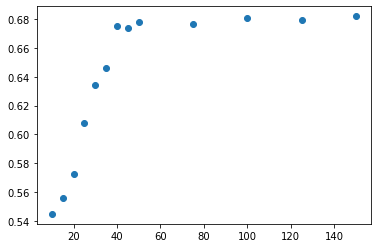

In [167]:
import matplotlib.pyplot as plt

xs = [10,15,20,25,30,35,40,45,50,75,100,125,150]
ys = []
for max_depth in xs:
    model=DecisionTreeClassifier(max_depth=max_depth)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    precision= precision_score(y_test, y_pred, pos_label=1)
    ys.append(precision)
    print(precision)
    
plt.scatter(xs,ys)


In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
#from sklearn.datasets import make_moons
#X, y = make_moons()

model=DecisionTreeClassifier()
param_grid = {
    'max_depth': [10,15,20,25,30,40]}#35,40,45,50,75,100,125,150]}
search = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(precision_score))
search.fit(X, y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25, 30, 40]},
             scoring=make_scorer(precision_score))

In [180]:
print(search.cv_results_)
print(search.best_params_)
print(search.score)



{'mean_fit_time': array([0.15564179, 0.21547508, 0.2596544 , 0.28634906, 0.2992723 ,
       0.31097376]), 'std_fit_time': array([0.00150132, 0.00574732, 0.00758898, 0.0117414 , 0.01301193,
       0.01637328]), 'mean_score_time': array([0.00500429, 0.00600147, 0.00650597, 0.00700808, 0.00700665,
       0.00695014]), 'std_score_time': array([1.19209290e-07, 6.19888306e-06, 5.00440598e-04, 1.19209290e-06,
       0.00000000e+00, 5.81741333e-05]), 'param_max_depth': masked_array(data=[10, 15, 20, 25, 30, 40],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 15}, {'max_depth': 20}, {'max_depth': 25}, {'max_depth': 30}, {'max_depth': 40}], 'split0_test_score': array([0.53213238, 0.5239046 , 0.52131103, 0.51807386, 0.52224761,
       0.52126806]), 'split1_test_score': array([0.51852905, 0.51841304, 0.51918965, 0.52137536, 0.52170399,
       0.52192594]), 'mean_test_score': array([0.525330